### **Credit Risk Assessment Case Study**

**Problem Statement**

- A Bank providing Credit Money to Borrowers for different type of loans.
- In the event if a borrower defaults on their loan then the Bank analyses the amount of loss the bank has occurred.
- The term LGD (Loss Given Default) to calculate this loss at any point of time.
- The LGD value will help Bank to identify high-risk loans so that appropriate actions can be taken to mitigate the risks.
- The Bank wants to understand LGD value of the borrower in case of default.

**Plan of Action**

- Importing and loading Data
- Data Cleaning
- Visualize the data
- Data preprocessing
- Building Model
- Building Predication
- Business Recommendation

### **Step 1**

In [1]:
#Importing the necessary libraries
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.pandas.set_option('display.max_columns', None)
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn import metrics

In [2]:
# Importing the dataset

from google.colab import files


uploaded = files.upload()

Saving main_loan_base.csv to main_loan_base.csv
Saving monthly_balance_base.csv to monthly_balance_base.csv
Saving repayment_base.csv to repayment_base.csv


In [125]:
import pandas as pd
import io

main_db=pd.read_csv(io.BytesIO(uploaded['main_loan_base.csv']))
repayment_db=pd.read_csv(io.BytesIO(uploaded['repayment_base.csv']))
monthly_balance_db=pd.read_csv(io.BytesIO(uploaded['monthly_balance_base.csv']))


In [126]:
main_db.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date
0,LN79307711,Aarna Sura,"09/506, Anand Path, Ongole 646592",Consumer-Durable,21916,4929.47,3,0,3,127,2,10.1,1012.32,2019-04-14,2020-07-31
1,LN88987787,Amira Konda,"11, Dhaliwal Circle\nRaichur 659460",Two-Wheeler,121184,10254.50,1,0,0,156,2,11.8,5693.24,2015-04-14,2016-07-30
2,LN78096023,Eshani Khosla,H.No. 31\nAtwal Street\nKatihar-037896,Car,487036,116183.86,0,1,10,22,3,14.6,16788.02,2015-01-10,2015-04-18
3,LN56862431,Divij Kala,"766, Gulati Marg\nPudukkottai-051396",Two-Wheeler,52125,10310.05,5,2,9,30,2,9.6,2395.69,2018-02-07,2018-09-13
4,LN77262680,Vaibhav Bir,"55/73, Sachdev Marg\nDharmavaram-332966",Consumer-Durable,8635,1051.25,0,1,3,62,2,9.6,396.87,2014-12-25,2016-02-20


In [127]:
repayment_db.head()

,loan_acc_num,repayment_amount,repayment_date
0,LN79307711,1012.320000,2019-05-18
1,LN79307711,667.987539,2019-06-20
2,LN79307711,1012.320000,2019-07-16
3,LN79307711,1012.320000,2019-08-16
4,LN79307711,1012.320000,2019-09-22


In [128]:
monthly_balance_db.head()

,loan_acc_num,date,balance_amount
0,LN79307711,2010-03-26,407.343213
1,LN79307711,2010-04-25,545.431227
2,LN79307711,2010-05-25,861.932145
3,LN79307711,2010-06-24,562.082133
4,LN79307711,2010-07-24,37.768861


###**Step 2**

**Data Cleaning**

In [129]:
# Checking the shape
print("Main_DB_Shape",main_db.shape)
print("Repayment_DB_Shape",repayment_db.shape)
print("Montly_Balance_DB_Shape",monthly_balance_db.shape)

Main_DB_Shape (50000, 15)
Repayment_DB_Shape (626601, 3)
Montly_Balance_DB_Shape (4002490, 3)


In [130]:
# Checking datatype
main_db.dtypes

loan_acc_num          object
customer_name         object
customer_address      object
loan_type             object
loan_amount            int64
collateral_value     float64
cheque_bounces         int64
number_of_loans        int64
missed_repayments      int64
vintage_in_months      int64
tenure_years           int64
interest             float64
monthly_emi          float64
disbursal_date        object
default_date          object
dtype: object

In [131]:
# Changing the datatype of disbursal_date and default_date to datetime from object datatype
main_db["disbursal_date"]=pd.to_datetime(main_db["disbursal_date"])
main_db["default_date"]=pd.to_datetime(main_db["default_date"])
main_db.dtypes

loan_acc_num                 object
customer_name                object
customer_address             object
loan_type                    object
loan_amount                   int64
collateral_value            float64
cheque_bounces                int64
number_of_loans               int64
missed_repayments             int64
vintage_in_months             int64
tenure_years                  int64
interest                    float64
monthly_emi                 float64
disbursal_date       datetime64[ns]
default_date         datetime64[ns]
dtype: object

In [132]:
# Checking the datatype of repayment_db
repayment_db.dtypes

loan_acc_num         object
repayment_amount    float64
repayment_date       object
dtype: object

In [133]:
# Changing the datatype of repayment_date to datetime datatype
repayment_db["repayment_date"]=pd.to_datetime(repayment_db["repayment_date"])
repayment_db.dtypes

loan_acc_num                object
repayment_amount           float64
repayment_date      datetime64[ns]
dtype: object

In [134]:
# Resetting the index
repayment_db=repayment_db.set_index("loan_acc_num")

# Summation of all repayment value
repayment_db=repayment_db.sum(level=0)

In [135]:
# Checking the datatype of montly_balance_db
monthly_balance_db.dtypes

loan_acc_num       object
date               object
balance_amount    float64
dtype: object

In [136]:
# Changing the datatype of date to datetime datatype
monthly_balance_db["date"]=pd.to_datetime(monthly_balance_db["date"])
monthly_balance_db.dtypes

loan_acc_num              object
date              datetime64[ns]
balance_amount           float64
dtype: object

In [137]:
# Resetting the index
monthly_balance_db=monthly_balance_db.set_index("loan_acc_num")

In [138]:
# Summation of monthly balance
monthly_balance_db=monthly_balance_db.sum(level=0)

In [139]:
# Checking for null values
main_db.isnull().sum()

loan_acc_num         0
customer_name        0
customer_address     0
loan_type            0
loan_amount          0
collateral_value     0
cheque_bounces       0
number_of_loans      0
missed_repayments    0
vintage_in_months    0
tenure_years         0
interest             0
monthly_emi          0
disbursal_date       0
default_date         0
dtype: int64

In [140]:
repayment_db.isnull().sum()

repayment_amount    0
dtype: int64

In [141]:
monthly_balance_db.isnull().sum()

balance_amount    0
dtype: int64

### **Merging Columns**

In [142]:
# Merging repayment_db and monthly_balance_db with main_db
main_db=pd.merge(main_db,repayment_db,how="outer",on="loan_acc_num")
main_db=pd.merge(main_db,monthly_balance_db,how="outer",on="loan_acc_num")

In [143]:
main_db

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount,balance_amount
0,LN79307711,Aarna Sura,"09/506, Anand Path, Ongole 646592",Consumer-Durable,21916,4929.47,3,0,3,127,2,10.1,1012.32,2019-04-14,2020-07-31,13572.577778,7.318932e+04
1,LN88987787,Amira Konda,"11, Dhaliwal Circle\nRaichur 659460",Two-Wheeler,121184,10254.50,1,0,0,156,2,11.8,5693.24,2015-04-14,2016-07-30,96243.609484,1.203271e+06
2,LN78096023,Eshani Khosla,H.No. 31\nAtwal Street\nKatihar-037896,Car,487036,116183.86,0,1,10,22,3,14.6,16788.02,2015-01-10,2015-04-18,74083.731181,1.796964e+05
3,LN56862431,Divij Kala,"766, Gulati Marg\nPudukkottai-051396",Two-Wheeler,52125,10310.05,5,2,9,30,2,9.6,2395.69,2018-02-07,2018-09-13,NaN,1.398820e+04
4,LN77262680,Vaibhav Bir,"55/73, Sachdev Marg\nDharmavaram-332966",Consumer-Durable,8635,1051.25,0,1,3,62,2,9.6,396.87,2014-12-25,2016-02-20,4462.514597,2.039179e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,LN82044693,Urvi Mannan,81\nDey Nagar\nPhagwara-163985,Two-Wheeler,222483,43088.19,2,2,8,42,2,9.6,10225.44,2021-02-03,2022-01-24,30676.320000,1.940249e+05
49996,LN37968463,Yasmin Tailor,"45/573, Kakar Path\nBathinda 988155",Two-Wheeler,104051,8666.54,6,2,9,86,3,12.6,3485.88,2013-01-12,2014-04-06,38421.067071,1.336263e+05
49997,LN87152445,Kaira Chandran,36/99\nGokhale Circle\nDeoghar 359508,Two-Wheeler,51767,4101.24,1,0,4,156,2,14.0,2485.48,2016-05-01,2017-02-05,43784.343005,4.453178e+05
49998,LN74765572,Kashvi Toor,"69/60\nRege Nagar, New Delhi 735977",Two-Wheeler,77869,10652.77,0,0,5,84,2,14.9,3771.91,2013-08-29,2014-10-01,52305.658537,3.363175e+05


In [144]:
# Checking for null values Again
round(main_db.isnull().sum()/len(main_db)*100,2)

loan_acc_num         0.00
customer_name        0.00
customer_address     0.00
loan_type            0.00
loan_amount          0.00
collateral_value     0.00
cheque_bounces       0.00
number_of_loans      0.00
missed_repayments    0.00
vintage_in_months    0.00
tenure_years         0.00
interest             0.00
monthly_emi          0.00
disbursal_date       0.00
default_date         0.00
repayment_amount     7.95
balance_amount       0.63
dtype: float64

### **Replacing Values**

In [145]:
main_db=main_db.fillna(0)

In [146]:
round(main_db.isnull().sum()/len(main_db)*100,2)

loan_acc_num         0.0
customer_name        0.0
customer_address     0.0
loan_type            0.0
loan_amount          0.0
collateral_value     0.0
cheque_bounces       0.0
number_of_loans      0.0
missed_repayments    0.0
vintage_in_months    0.0
tenure_years         0.0
interest             0.0
monthly_emi          0.0
disbursal_date       0.0
default_date         0.0
repayment_amount     0.0
balance_amount       0.0
dtype: float64

### **Removing Redundunt Variables**

In [147]:
main_db=main_db.drop(["customer_name","customer_address","disbursal_date","default_date"],axis=1)

In [148]:
# Checking the final shape
main_db.shape

(50000, 13)

In [149]:
# Dropping the Duplicated Loan_acc_numeber as the loan account number are the unique number
main_db.drop_duplicates(subset="loan_acc_num",inplace=True)
main_db.shape

(49985, 13)

### **Feature Engineering**
- Creating the Target Variable i.e Loss Given Default (LGD)
- LGD=(loan amount-(collateral amount + replacement amount))/loan amount

In [150]:
main_db["LGD"]=(main_db["loan_amount"]-(main_db["collateral_value"]+main_db["repayment_amount"]))/main_db["loan_amount"]

In [151]:
# Now Dropping the loan Amount, Collateral Value and Repayment value as there are highly correlated with Target Variable
main_db=main_db.drop(["loan_amount","collateral_value","repayment_amount"],axis=1)
main_db.head()

,loan_acc_num,loan_type,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,balance_amount,LGD
0,LN79307711,Consumer-Durable,3,0,3,127,2,10.1,1012.32,7.318932e+04,0.155774
1,LN88987787,Two-Wheeler,1,0,0,156,2,11.8,5693.24,1.203271e+06,0.121187
2,LN78096023,Car,0,1,10,22,3,14.6,16788.02,1.796964e+05,0.609336
3,LN56862431,Two-Wheeler,5,2,9,30,2,9.6,2395.69,1.398820e+04,0.802205
4,LN77262680,Consumer-Durable,0,1,3,62,2,9.6,396.87,2.039179e+04,0.361463


In [152]:
#Rounding Values
main_db=np.round(main_db,2)

In [153]:
main_db=main_db.set_index("loan_acc_num")
main_db.head()

,loan_type,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,balance_amount,LGD
loan_acc_num,,,,,,,,,,
LN79307711,Consumer-Durable,3,0,3,127,2,10.1,1012.32,73189.32,0.16
LN88987787,Two-Wheeler,1,0,0,156,2,11.8,5693.24,1203270.92,0.12
LN78096023,Car,0,1,10,22,3,14.6,16788.02,179696.35,0.61
LN56862431,Two-Wheeler,5,2,9,30,2,9.6,2395.69,13988.20,0.80
LN77262680,Consumer-Durable,0,1,3,62,2,9.6,396.87,20391.79,0.36


### **Step 3**

### **Data Visulization**

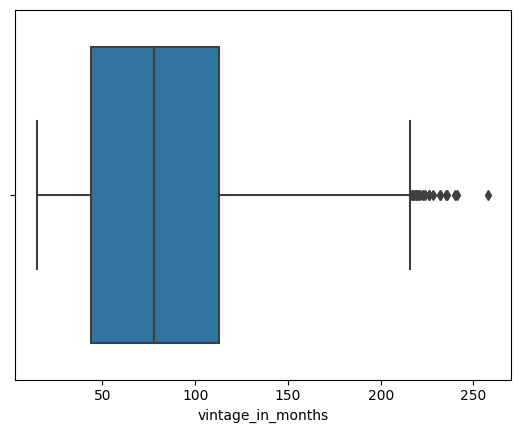

In [154]:
# Finding Outliers
sns.boxplot(data=main_db,x="vintage_in_months")
plt.show()

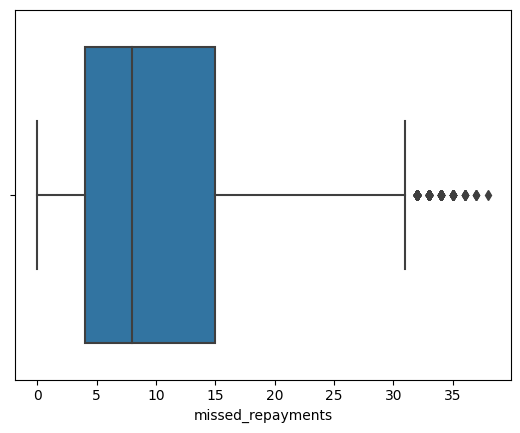

In [155]:
sns.boxplot(data=main_db,x="missed_repayments")
plt.show()

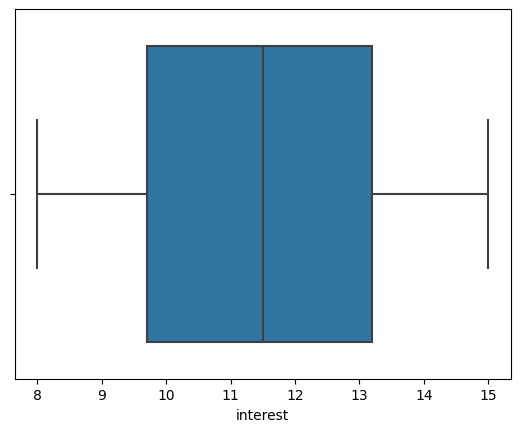

In [156]:
sns.boxplot(data=main_db,x="interest")
plt.show()

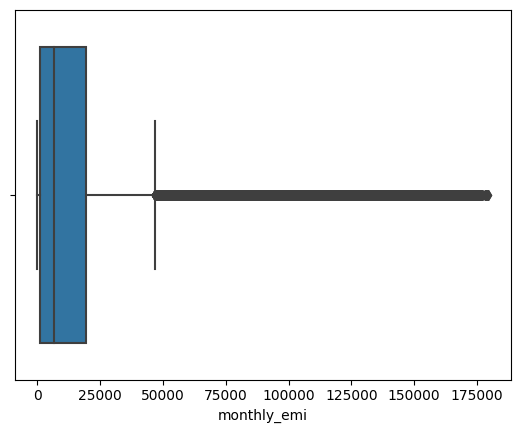

In [157]:
sns.boxplot(data=main_db,x="monthly_emi")
plt.show()

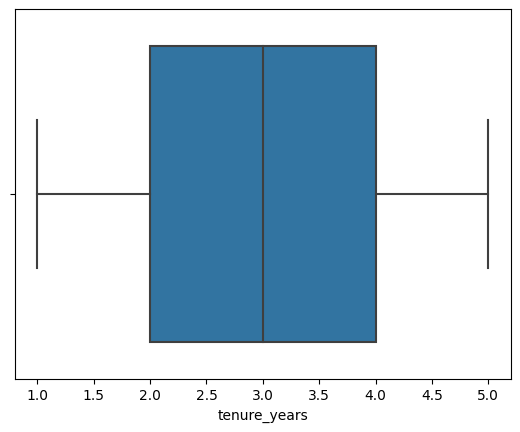

In [158]:
sns.boxplot(data=main_db,x="tenure_years")
plt.show()

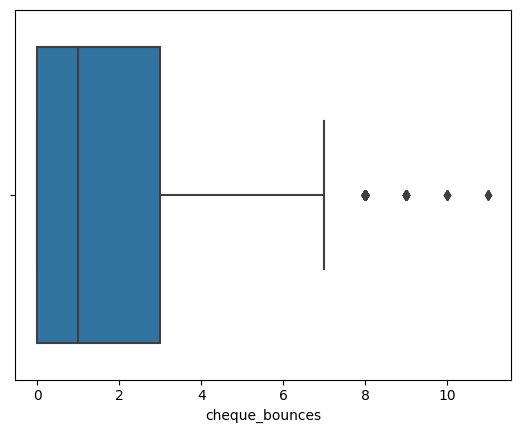

In [159]:
sns.boxplot(data=main_db,x="cheque_bounces")
plt.show()

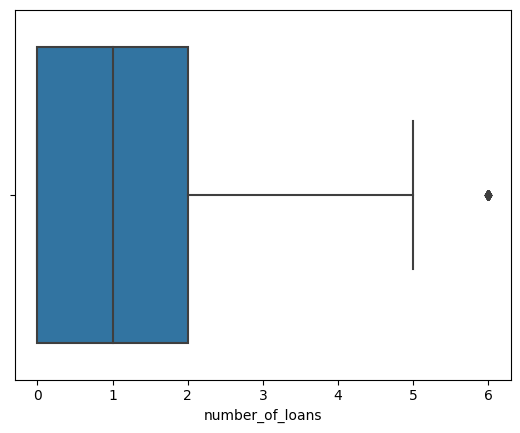

In [160]:
sns.boxplot(data=main_db,x="number_of_loans")
plt.show()

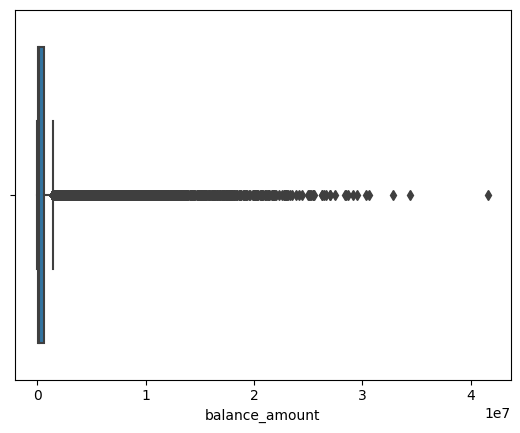

In [161]:
sns.boxplot(data=main_db,x="balance_amount")
plt.show()

In [162]:
# Handling outliers by changing the quantile to 90%
main_db=main_db[main_db["vintage_in_months"]<main_db.vintage_in_months.quantile(0.90)]
main_db=main_db[main_db["monthly_emi"]<main_db.monthly_emi.quantile(0.90)]
main_db=main_db[main_db["missed_repayments"]<main_db.missed_repayments.quantile(0.90)]
main_db=main_db[main_db["balance_amount"]<main_db.balance_amount.quantile(0.90)]

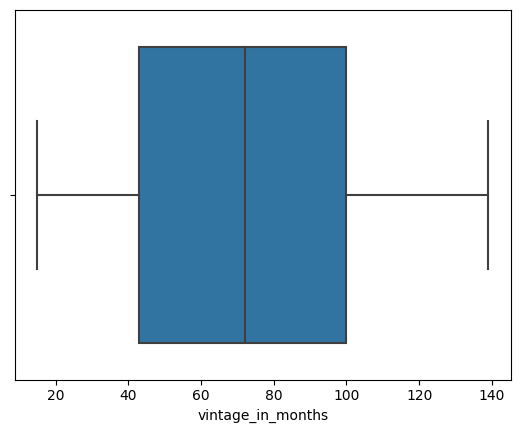

In [163]:
# Checking outliers again
sns.boxplot(data=main_db,x="vintage_in_months")
plt.show()

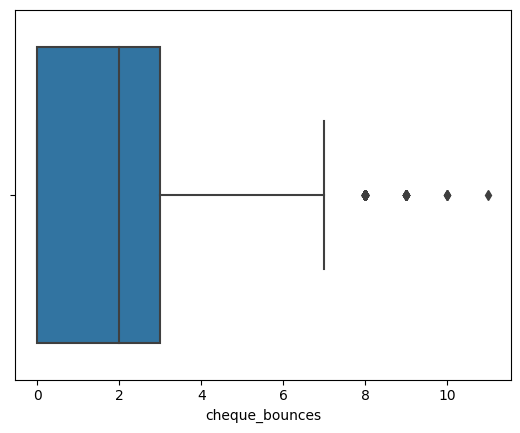

In [164]:
sns.boxplot(data=main_db,x="cheque_bounces")
plt.show()

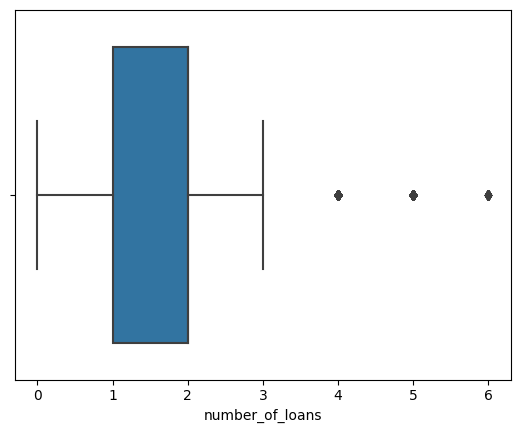

In [165]:
sns.boxplot(data=main_db,x="number_of_loans")
plt.show()

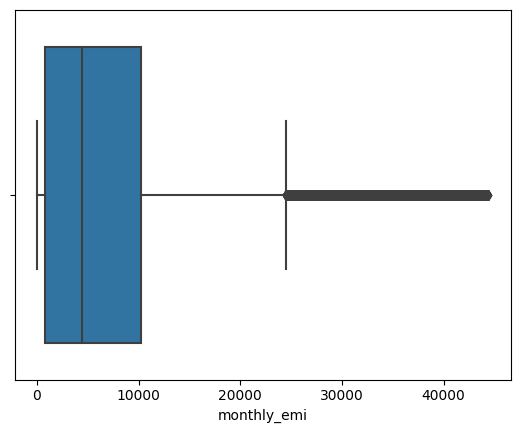

In [166]:
sns.boxplot(data=main_db,x="monthly_emi")
plt.show()

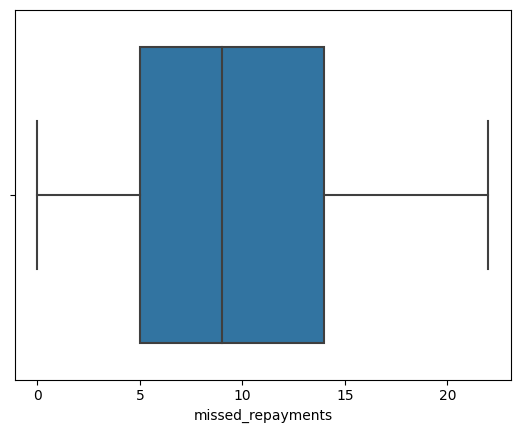

In [167]:
sns.boxplot(data=main_db,x="missed_repayments")
plt.show()

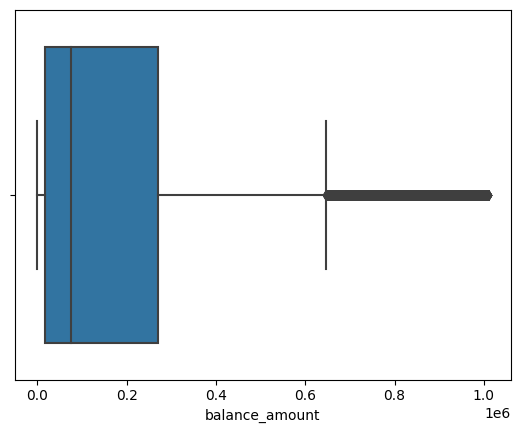

In [168]:
sns.boxplot(data=main_db,x="balance_amount")
plt.show()

### **Univariate Analysis**

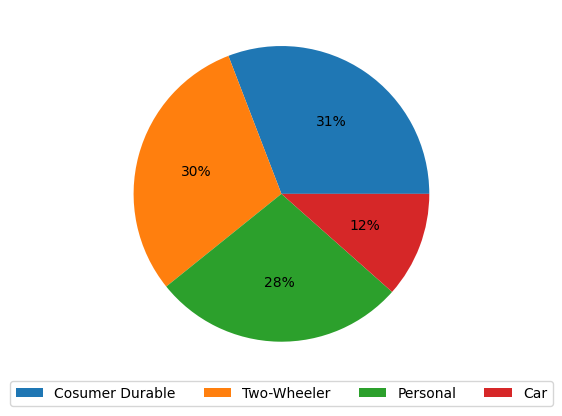

In [169]:
Labels=["Cosumer Durable","Two-Wheeler","Personal","Car"]
plt.pie(main_db.loan_type.value_counts(normalize=True),autopct='%1.0f%%')
plt.legend(labels=Labels, loc='center',
           bbox_to_anchor=(0.5, -0.04), ncol=6)
plt.show()

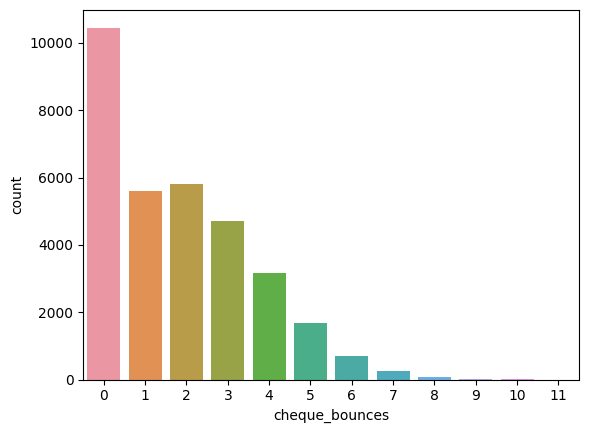

In [170]:
sns.countplot(data=main_db,x="cheque_bounces")
plt.show()

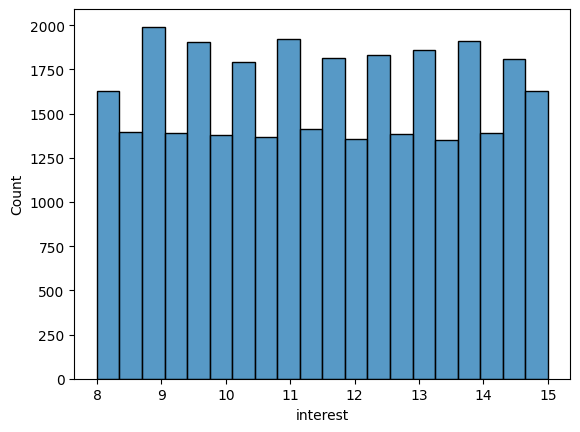

In [171]:
sns.histplot(data=main_db,x="interest",bins=20)
plt.show()

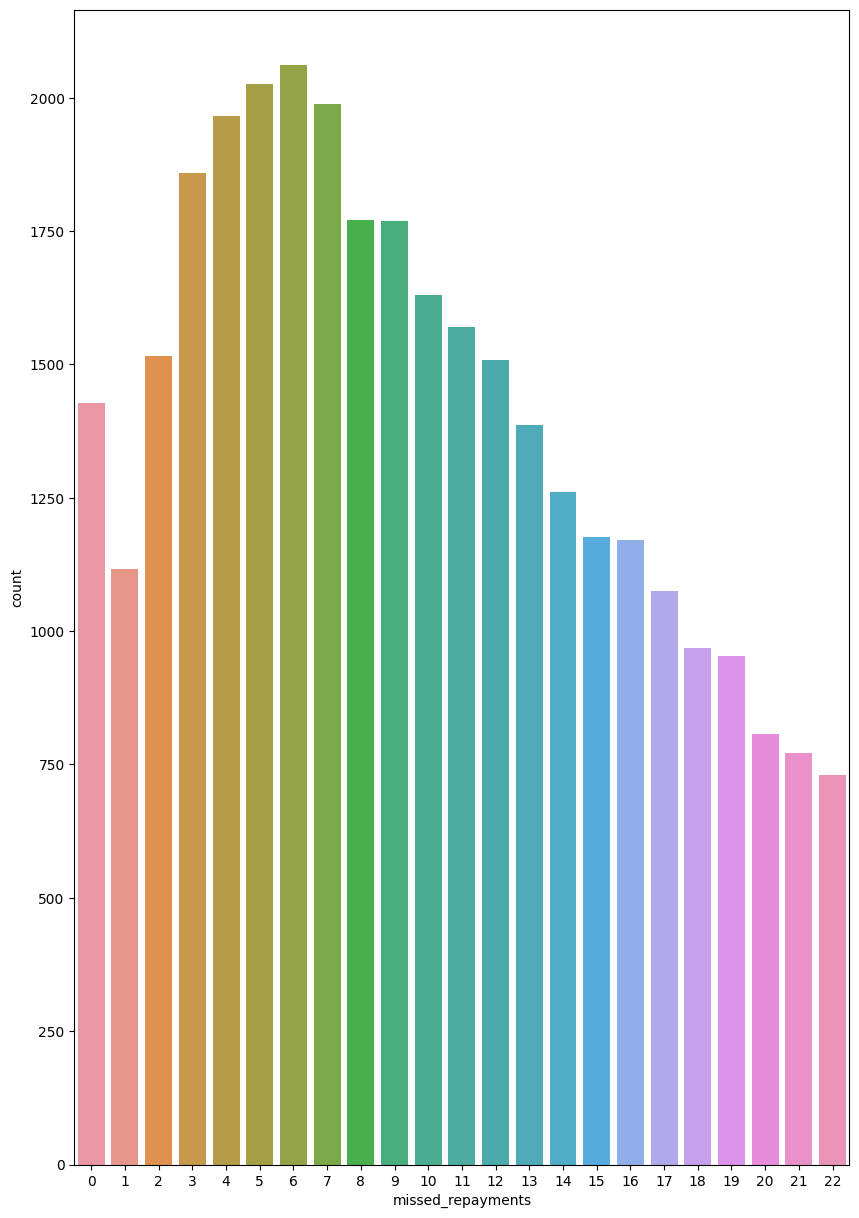

In [172]:
plt.figure(figsize=(10,15))
sns.countplot(data=main_db,x="missed_repayments")
plt.show()

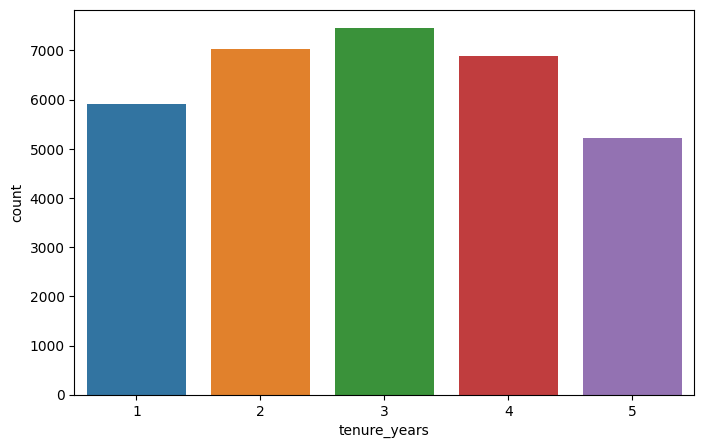

In [173]:
plt.figure(figsize=(8,5))
sns.countplot(data=main_db,x="tenure_years")
plt.show()

**Observations**
- From the pie chart we can observe that 31% loan type is consumer_durable loan , 30% loan type is Two Wheeler loan, 28% is personal loan and 12% is Car loan.
- We can conclude that most of customer have 0 cheque bounce.
- We can conclude that the interest rate bracket decided by bank is from 8% till 15%.
- We can conclude that many customer has missed there repayment of loan and most of customer missing about 5-7 installment of repayment only few customer are doing repayment on time.
- We can observe that most of the loan having repayment during of 3 years .



### **Bivariate Analysis**

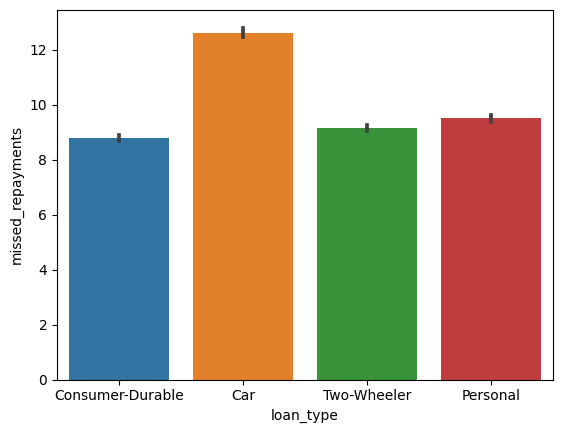

In [174]:
sns.barplot(data=main_db,x="loan_type",y="missed_repayments")
plt.show()

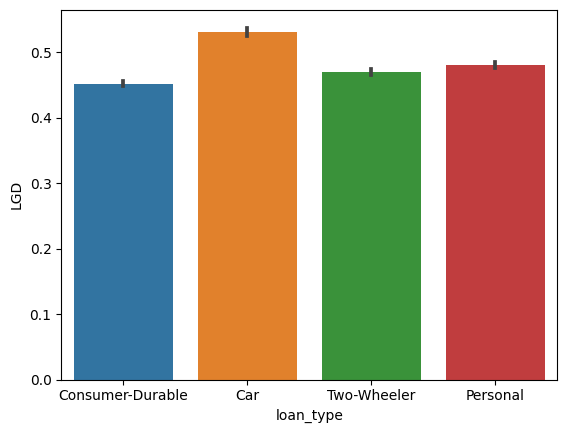

In [175]:
sns.barplot(data=main_db,x="loan_type",y="LGD")
plt.show()

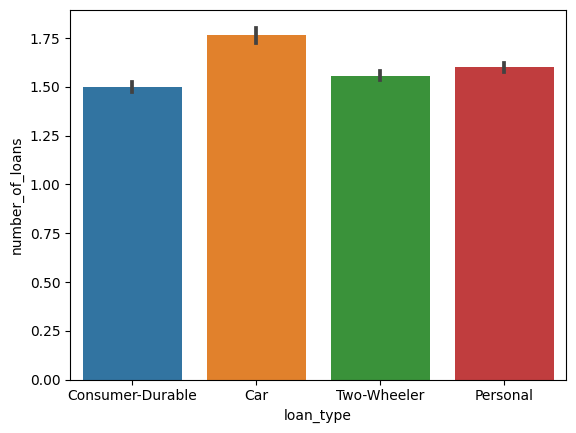

In [176]:
sns.barplot(data=main_db,x="loan_type",y="number_of_loans")
plt.show()

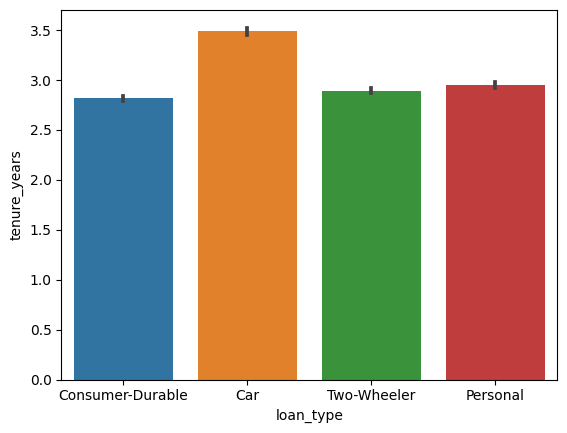

In [177]:
sns.barplot(data=main_db,x="loan_type",y="tenure_years")
plt.show()

**Observations**
- We can conclude that customer having Car loan has missed the repayment most.
- We can observe that customer who taken Car loan have more chances of getting Default.
- We can observe that Customer who have car loan have also have some another loan.
- We can conclude that customer taken Car loan have maximumn number of tenure year to repay the loan.
-

### **Multivariate Analysis**


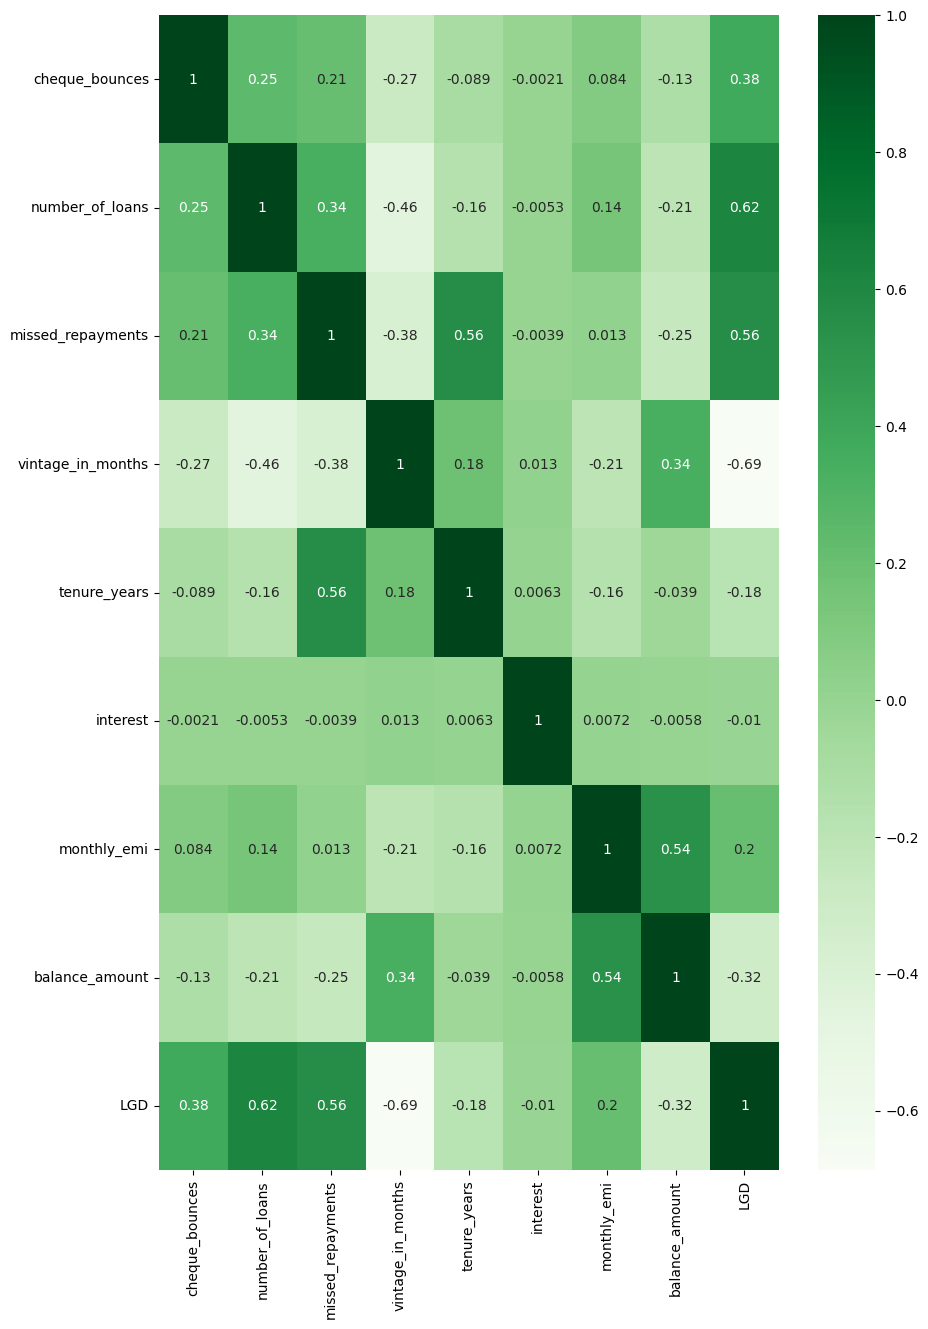

In [178]:
plt.figure(figsize=(10,15))
sns.heatmap(data=main_db.corr(),annot=True,cmap="Greens")
plt.show()

**Observations**
- From the heatmap we can observe that missed repayment, number of cheque bounces and number of loan are highly correlated with the LGD variable.


### **Step 4**

### **Data Preprocessing**

In [179]:
# Changing data type of loan_type categorical Data type
main_db.loan_type=main_db.loan_type.astype("category")
main_db.dtypes

loan_type            category
cheque_bounces          int64
number_of_loans         int64
missed_repayments       int64
vintage_in_months       int64
tenure_years            int64
interest              float64
monthly_emi           float64
balance_amount        float64
LGD                   float64
dtype: object

### **Dummy Variable Creation**

In [180]:
main_db=pd.get_dummies(main_db,drop_first=True)
main_db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32506 entries, LN79307711 to LN46546410
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cheque_bounces              32506 non-null  int64  
 1   number_of_loans             32506 non-null  int64  
 2   missed_repayments           32506 non-null  int64  
 3   vintage_in_months           32506 non-null  int64  
 4   tenure_years                32506 non-null  int64  
 5   interest                    32506 non-null  float64
 6   monthly_emi                 32506 non-null  float64
 7   balance_amount              32506 non-null  float64
 8   LGD                         32506 non-null  float64
 9   loan_type_Consumer-Durable  32506 non-null  uint8  
 10  loan_type_Personal          32506 non-null  uint8  
 11  loan_type_Two-Wheeler       32506 non-null  uint8  
dtypes: float64(4), int64(5), uint8(3)
memory usage: 3.6+ MB


### **Rescaling using MinMax Scaler**

In [181]:
scaler=MinMaxScaler()
list_1=["missed_repayments","vintage_in_months","interest","monthly_emi","balance_amount","LGD","cheque_bounces","number_of_loans"]
main_db[list_1]=scaler.fit_transform(main_db[list_1])
main_db.describe()

,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,balance_amount,LGD,loan_type_Consumer-Durable,loan_type_Personal,loan_type_Two-Wheeler
count,32506.000000,32506.000000,32506.000000,32506.000000,32506.000000,32506.000000,32506.000000,32506.000000,32506.000000,32506.000000,32506.000000,32506.000000
mean,0.166092,0.262726,0.433516,0.455959,2.954501,0.497696,0.169114,0.181927,0.935602,0.308405,0.276749,0.299452
std,0.160250,0.204265,0.273664,0.288882,1.340203,0.289477,0.205160,0.230506,0.033713,0.461842,0.447398,0.458025
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.166667,0.227273,0.225806,2.000000,0.242857,0.017144,0.017405,0.909228,0.000000,0.000000,0.000000
50%,0.181818,0.333333,0.409091,0.459677,3.000000,0.500000,0.099758,0.075596,0.937973,0.000000,0.000000,0.000000
75%,0.272727,0.333333,0.636364,0.685484,4.000000,0.742857,0.230552,0.266648,0.962179,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### **Splitting the data into X and Y**

In [182]:
main_db.head()

,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,balance_amount,LGD,loan_type_Consumer-Durable,loan_type_Personal,loan_type_Two-Wheeler
loan_acc_num,,,,,,,,,,,,
LN79307711,0.272727,0.000000,0.136364,0.903226,2,0.300000,0.021866,0.072461,0.888048,1,0,0
LN78096023,0.000000,0.166667,0.454545,0.056452,3,0.942857,0.377551,0.177907,0.956127,0,0,0
LN56862431,0.454545,0.333333,0.409091,0.120968,2,0.228571,0.053056,0.013849,0.984871,0,0,1
LN77262680,0.000000,0.166667,0.136364,0.379032,2,0.228571,0.007989,0.020189,0.918306,1,0,0
LN86537954,0.000000,0.166667,0.136364,0.532258,1,0.357143,0.239287,0.327213,0.950076,0,1,0


In [183]:
y_train=main_db.pop("LGD")
X_train=main_db

In [184]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32506 entries, LN79307711 to LN46546410
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cheque_bounces              32506 non-null  float64
 1   number_of_loans             32506 non-null  float64
 2   missed_repayments           32506 non-null  float64
 3   vintage_in_months           32506 non-null  float64
 4   tenure_years                32506 non-null  int64  
 5   interest                    32506 non-null  float64
 6   monthly_emi                 32506 non-null  float64
 7   balance_amount              32506 non-null  float64
 8   loan_type_Consumer-Durable  32506 non-null  uint8  
 9   loan_type_Personal          32506 non-null  uint8  
 10  loan_type_Two-Wheeler       32506 non-null  uint8  
dtypes: float64(7), int64(1), uint8(3)
memory usage: 3.3+ MB


In [185]:
y_train.head()

loan_acc_num
LN79307711    0.888048
LN78096023    0.956127
LN56862431    0.984871
LN77262680    0.918306
LN86537954    0.950076
Name: LGD, dtype: float64

### **Step 5**

### **Model Building Using RFE**

In [186]:
# Linear Regression
lm=LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [187]:
# Running the RFE and sorting independent variables.
rfe=RFE(lm,n_features_to_select=12)
rfe=rfe.fit(X_train, y_train)

In [188]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('cheque_bounces', True, 1),
 ('number_of_loans', True, 1),
 ('missed_repayments', True, 1),
 ('vintage_in_months', True, 1),
 ('tenure_years', True, 1),
 ('interest', True, 1),
 ('monthly_emi', True, 1),
 ('balance_amount', True, 1),
 ('loan_type_Consumer-Durable', True, 1),
 ('loan_type_Personal', True, 1),
 ('loan_type_Two-Wheeler', True, 1)]

In [189]:
# Creating the list of variable which holds "TRUE" and support by rfe.
col=X_train.columns[rfe.support_]
col

Index(['cheque_bounces', 'number_of_loans', 'missed_repayments',
       'vintage_in_months', 'tenure_years', 'interest', 'monthly_emi',
       'balance_amount', 'loan_type_Consumer-Durable', 'loan_type_Personal',
       'loan_type_Two-Wheeler'],
      dtype='object')

In [190]:
# Checking for "false" column which RFE does not support
X_train.columns[~rfe.support_]

Index([], dtype='object')

In [191]:
# Creating the X_train dataframe with RFE variable
X_train_rfe=X_train[col]
X_train_rfe

,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,balance_amount,loan_type_Consumer-Durable,loan_type_Personal,loan_type_Two-Wheeler
loan_acc_num,,,,,,,,,,,
LN79307711,0.272727,0.000000,0.136364,0.903226,2,0.300000,0.021866,0.072461,1,0,0
LN78096023,0.000000,0.166667,0.454545,0.056452,3,0.942857,0.377551,0.177907,0,0,0
LN56862431,0.454545,0.333333,0.409091,0.120968,2,0.228571,0.053056,0.013849,0,0,1
LN77262680,0.000000,0.166667,0.136364,0.379032,2,0.228571,0.007989,0.020189,1,0,0
LN86537954,0.000000,0.166667,0.136364,0.532258,1,0.357143,0.239287,0.327213,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
LN24294128,0.363636,0.333333,0.818182,0.145161,3,0.728571,0.009127,0.001524,1,0,0
LN82044693,0.181818,0.333333,0.363636,0.217742,2,0.228571,0.229588,0.192093,0,0,1
LN37968463,0.545455,0.333333,0.409091,0.572581,3,0.657143,0.077635,0.132296,0,0,1


### **Model 1**

In [192]:
import statsmodels.api as sm

# Adding Constant to all variable
X_train_rfe=sm.add_constant(X_train_rfe)

# Fiiting the Model
model_1=sm.OLS(y_train,X_train_rfe).fit()

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LGD   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                 1.003e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:53:45   Log-Likelihood:                 88136.
No. Observations:               32506   AIC:                        -1.762e+05
Df Residuals:                   32494   BIC:                        -1.761e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.9338      0.001   1451.269      0.000       0.933       0.935
cheque_bounces                 0.0166      0.001     27.921      0.000       0.015       0.018
number_of_loans                0.0300      0.001     56.157      0.000       0.029       0.031
missed_repayments              0.0766      0.001    143.555      0.000       0.076       0.078
vintage_in_months             -0.0234      0.000    -53.981      0.000      -0.024      -0.023
tenure_years                  -0.0111      0.000   -108.687      0.000      -0.011      -0.011
interest                      -0.0003      0.000     -0.973      0.331      -0.001       0.000
monthly_emi                    0.0196      0.001     26.399      0.000       0.018       0.021
balance_amount                -0.0190      0.001    -32.742      0.000      -0.020      -0.018
loan_type_Consumer-Durable     0.0007      0.000      1.428      0.153      -0.000       0.002
loan_type_Personal             0.0028      0.000      7.553      0.000       0.002       0.004
loan_type_Two-Wheeler          0.0028      0.000      6.889      0.000       0.002       0.004
==============================================================================
Omnibus:                    59588.842   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        643085684.209
Skew:                         -12.801   Prob(JB):                         0.00
Kurtosis:                     691.586   Cond. No.                         41.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [193]:
#VIF Factor
vif= pd.DataFrame()
vif["Feature"]=X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Feature,VIF
0,const,52.05
9,loan_type_Consumer-Durable,6.05
11,loan_type_Two-Wheeler,4.27
10,loan_type_Personal,3.55
7,monthly_emi,2.91
3,missed_repayments,2.68
5,tenure_years,2.37
8,balance_amount,2.24
4,vintage_in_months,1.98
2,number_of_loans,1.50


**Observations**
- So the R2 score we get from model this model is 77.3% and is good
- We can also observe that VIF of loan_type_Consumer-Durable is more than 5 we will drop the loan_type_Consumer-Durable variable


In [194]:
X_train_rfe=X_train_rfe.drop("loan_type_Consumer-Durable", axis=1)

X_train_rfe=sm.add_constant(X_train_rfe)

model_1=sm.OLS(y_train,X_train_rfe).fit()

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LGD   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                 1.104e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:53:45   Log-Likelihood:                 88135.
No. Observations:               32506   AIC:                        -1.762e+05
Df Residuals:                   32495   BIC:                        -1.762e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.9345      0.000   2286.770      0.000       0.934       0.935
cheque_bounces            0.0166      0.001     27.914      0.000       0.015       0.018
number_of_loans           0.0300      0.001     56.168      0.000       0.029       0.031
missed_repayments         0.0765      0.001    143.923      0.000       0.075       0.078
vintage_in_months        -0.0234      0.000    -53.967      0.000      -0.024      -0.023
tenure_years             -0.0112      0.000   -111.573      0.000      -0.011      -0.011
interest                 -0.0003      0.000     -0.951      0.342      -0.001       0.000
monthly_emi               0.0190      0.001     31.467      0.000       0.018       0.020
balance_amount           -0.0191      0.001    -33.605      0.000      -0.020      -0.018
loan_type_Personal        0.0024      0.000     10.706      0.000       0.002       0.003
loan_type_Two-Wheeler     0.0023      0.000     10.545      0.000       0.002       0.003
==============================================================================
Omnibus:                    59585.883   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        642927600.959
Skew:                         -12.799   Prob(JB):                         0.00
Kurtosis:                     691.502   Cond. No.                         31.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [195]:
vif= pd.DataFrame()
vif["Feature"]=X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Feature,VIF
0,const,20.99
3,missed_repayments,2.66
5,tenure_years,2.26
8,balance_amount,2.16
4,vintage_in_months,1.98
7,monthly_emi,1.92
2,number_of_loans,1.49
9,loan_type_Personal,1.27
10,loan_type_Two-Wheeler,1.24
1,cheque_bounces,1.14


- We will drop the interest variable due to high P-value >0.05

In [196]:
X_train_rfe=X_train_rfe.drop("interest", axis=1)

X_train_rfe=sm.add_constant(X_train_rfe)

model_1=sm.OLS(y_train,X_train_rfe).fit()

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LGD   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                 1.226e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:53:45   Log-Likelihood:                 88134.
No. Observations:               32506   AIC:                        -1.762e+05
Df Residuals:                   32496   BIC:                        -1.762e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.9344      0.000   2455.045      0.000       0.934       0.935
cheque_bounces            0.0166      0.001     27.913      0.000       0.015       0.018
number_of_loans           0.0300      0.001     56.168      0.000       0.029       0.031
missed_repayments         0.0765      0.001    143.932      0.000       0.076       0.078
vintage_in_months        -0.0234      0.000    -53.994      0.000      -0.024      -0.023
tenure_years             -0.0112      0.000   -111.583      0.000      -0.011      -0.011
monthly_emi               0.0190      0.001     31.454      0.000       0.018       0.020
balance_amount           -0.0191      0.001    -33.593      0.000      -0.020      -0.018
loan_type_Personal        0.0024      0.000     10.707      0.000       0.002       0.003
loan_type_Two-Wheeler     0.0023      0.000     10.545      0.000       0.002       0.003
==============================================================================
Omnibus:                    59580.411   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        642609655.534
Skew:                         -12.797   Prob(JB):                         0.00
Kurtosis:                     691.331   Cond. No.                         30.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [197]:
vif= pd.DataFrame()
vif["Feature"]=X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Feature,VIF
0,const,18.21
3,missed_repayments,2.66
5,tenure_years,2.26
7,balance_amount,2.16
4,vintage_in_months,1.97
6,monthly_emi,1.92
2,number_of_loans,1.49
8,loan_type_Personal,1.27
9,loan_type_Two-Wheeler,1.24
1,cheque_bounces,1.14


- We get a good value of R2 from this model at 77.3%

### **Model 2**

**Decision Tree**

In [198]:
Model_2=DecisionTreeRegressor(max_depth=5)
Model_2.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [199]:
# Testing the train data set
y_train_pred_Model_2=Model_2.predict(X_train)
R_2_score_Model_2_train=r2_score(y_true=y_train,y_pred=y_train_pred_Model_2)
R_2_score_Model_2_train

0.6953876881874889

**Observations**
- The Random Forest Model gives us an R2 Score of 69% which is less than Model 1.


### **Model 3**

**Random Forest**

In [200]:
# Training Random Forest Model to get Best model with high accuracy.
Model_3=RandomForestRegressor(n_estimators=50,random_state=42)
Model_3.fit(X_train,y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [201]:
# Testing the train data set
y_train_pred_Model_3=Model_3.predict(X_train)

In [202]:
# R2 Score on train data set
R_2_score_Model_3_train=r2_score(y_true=y_train,y_pred=y_train_pred_Model_3)
R_2_score_Model_3_train

0.9726649641130396

**Observations**
- We get R2 Score of 97% from Model 3 which is very good,


### **Model 4**

**Random Forest Hyper-Parameter Tuning**

In [203]:
from sklearn.model_selection import RandomizedSearchCV
Model_4=RandomForestRegressor(random_state=42,n_jobs=-1)

In [204]:
# Definining the Paramters

params = {
    "max_depth": [5, 10, 20, 30, 40, 50, 100],
    "min_samples_leaf": [5, 10, 20, 50, 100, 250,500],
     "n_estimators":[5,10,20,50]
}

grid_search=RandomizedSearchCV(estimator=Model_4,param_distributions=params,cv=4,verbose=1,scoring="accuracy",n_jobs=-1)

# Fitting the grid search
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 20, 30, 40, 50,
                                                      100],
                                        'min_samples_leaf': [5, 10, 20, 50, 100,
                                                             250, 500],
                                        'n_estimators': [5, 10, 20, 50]},
                   scoring='accuracy', verbose=1)

In [205]:
# Best Estimator
Model_4=grid_search.best_estimator_
Model_4

RandomForestRegressor(max_depth=10, min_samples_leaf=50, n_estimators=20,
                      n_jobs=-1, random_state=42)

In [206]:
# Train Dataset Prdiction
y_train_pred_Model_4=Model_4.predict(X_train)
y_train_pred_Model_4

array([0.89174676, 0.93838062, 0.9674991 , ..., 0.92885039, 0.91466204,
       0.93022912])

In [207]:
# Train Data R2 score
R_2_score_Model_4_train=r2_score(y_true=y_train,y_pred=y_train_pred_Model_4)
R_2_score_Model_4_train

0.8040034640294436

**Observations**
- Random forest model with Hyperparamter Tuning gives us a R2 score OF 80%  


- Checking the accuracy on test data set to decide which model to get finalized

### **Step 6**

**Model Evaluation**

In [209]:
# Importing the Test data set

from google.colab import files


uploaded = files.upload()

Saving test_main_loan_base.csv to test_main_loan_base.csv
Saving test_monthly_balance_base.csv to test_monthly_balance_base.csv
Saving test_repayment_base.csv to test_repayment_base.csv


In [210]:
import pandas as pd
import io

test_main=pd.read_csv(io.BytesIO(uploaded['test_main_loan_base.csv']))
test_repayment=pd.read_csv(io.BytesIO(uploaded['test_repayment_base.csv']))
test_balance=pd.read_csv(io.BytesIO(uploaded['test_monthly_balance_base.csv']))
test_main.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date
0,LN14086568,Jayesh Kar,"83/65, Deo Circle\nBhagalpur-852841",Car,1259062,10184.09,3,1,5,103,1,12.1,111925.04,2014-11-23,2015-04-30
1,LN37082418,Kaira Chhabra,17\nSule Ganj\nAizawl 491897,Consumer-Durable,21731,2313.21,0,3,26,39,5,12.2,485.59,2014-01-11,2017-03-11
2,LN42963368,Anahita Bhargava,51/421\nKannan Chowk\nVaranasi-209999,Car,207660,8308.71,1,2,0,63,1,13.9,18635.42,2012-10-26,2013-06-23
3,LN54572294,Myra Samra,"22\nSubramanian Marg, Bhilai 850327",Two-Wheeler,193528,26432.24,4,3,12,15,2,12.5,9155.29,2021-10-07,2023-01-19
4,LN65792799,Arhaan Rana,"22, Kapoor Road\nJalandhar 667155",Consumer-Durable,5980,1641.66,1,1,0,152,1,14.6,538.62,2020-03-04,2020-10-08


In [211]:
# Checking dtype
test_main.dtypes

loan_acc_num          object
customer_name         object
customer_address      object
loan_type             object
loan_amount            int64
collateral_value     float64
cheque_bounces         int64
number_of_loans        int64
missed_repayments      int64
vintage_in_months      int64
tenure_years           int64
interest             float64
monthly_emi          float64
disbursal_date        object
default_date          object
dtype: object

In [212]:
# Changing the datatype of disbursal and default date column to date type
test_main["disbursal_date"]=pd.to_datetime(test_main["disbursal_date"])
test_main["default_date"]=pd.to_datetime(test_main["default_date"])

In [213]:
# Checking dtype
test_main.dtypes

loan_acc_num                 object
customer_name                object
customer_address             object
loan_type                    object
loan_amount                   int64
collateral_value            float64
cheque_bounces                int64
number_of_loans               int64
missed_repayments             int64
vintage_in_months             int64
tenure_years                  int64
interest                    float64
monthly_emi                 float64
disbursal_date       datetime64[ns]
default_date         datetime64[ns]
dtype: object

In [214]:
# Checking the test_repaymnet  dataset and changing the dtype of repayment_date to date type.
test_repayment=test_repayment.set_index("loan_acc_num")
test_repayment["repayment_date"]=pd.to_datetime(test_repayment["repayment_date"])
test_repayment.head()

,repayment_amount,repayment_date
loan_acc_num,,
LN14086568,111925.040000,2014-12-19
LN14086568,111925.040000,2015-01-26
LN14086568,111925.040000,2015-02-21
LN14086568,111925.040000,2015-03-20
LN14086568,11590.317813,2015-04-26


In [215]:
# Summation of repayment_amount
test_repayment=test_repayment.sum(level=0)
test_repayment.head()

,repayment_amount
loan_acc_num,
LN14086568,675861.052902
LN37082418,2208.645810
LN42963368,111812.520000
LN54572294,18310.580000
LN65792799,3428.641165


In [216]:
# Checking Null values
test_repayment.isnull().sum()

repayment_amount    0
dtype: int64

In [217]:
# Checking the test_balance data and changing the dtype of date column to date type.
test_balance=test_balance.set_index("loan_acc_num")
test_balance["date"]=pd.to_datetime(test_balance["date"])
test_balance.head()

,date,balance_amount
loan_acc_num,,
LN14086568,2006-12-13,9014.212689
LN14086568,2007-01-12,28129.516540
LN14086568,2007-02-11,10820.366663
LN14086568,2007-03-13,32491.477851
LN14086568,2007-04-12,24982.192310


In [218]:
# Summation of balance Amount
test_balance=test_balance.sum(level=0)
test_balance.head()

,balance_amount
loan_acc_num,
LN14086568,2.656059e+06
LN37082418,3.228481e+03
LN42963368,9.920800e+05
LN54572294,3.929411e+04
LN65792799,1.002798e+05


In [219]:
# Checking Null values
test_balance.isnull().sum()

balance_amount    0
dtype: int64

In [220]:
# Merging Data sets
Test_main_df=pd.merge(test_main,test_repayment,how="outer",on="loan_acc_num")
Test_main_df=pd.merge(Test_main_df,test_balance,how="outer",on="loan_acc_num")

In [221]:
# Checking the merged data set
Test_main_df.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount,balance_amount
0,LN14086568,Jayesh Kar,"83/65, Deo Circle\nBhagalpur-852841",Car,1259062,10184.09,3,1,5,103,1,12.1,111925.04,2014-11-23,2015-04-30,675861.052902,2.656059e+06
1,LN37082418,Kaira Chhabra,17\nSule Ganj\nAizawl 491897,Consumer-Durable,21731,2313.21,0,3,26,39,5,12.2,485.59,2014-01-11,2017-03-11,2208.645810,3.228481e+03
2,LN42963368,Anahita Bhargava,51/421\nKannan Chowk\nVaranasi-209999,Car,207660,8308.71,1,2,0,63,1,13.9,18635.42,2012-10-26,2013-06-23,111812.520000,9.920800e+05
3,LN54572294,Myra Samra,"22\nSubramanian Marg, Bhilai 850327",Two-Wheeler,193528,26432.24,4,3,12,15,2,12.5,9155.29,2021-10-07,2023-01-19,18310.580000,3.929411e+04
4,LN65792799,Arhaan Rana,"22, Kapoor Road\nJalandhar 667155",Consumer-Durable,5980,1641.66,1,1,0,152,1,14.6,538.62,2020-03-04,2020-10-08,3428.641165,1.002798e+05


In [222]:
# Checking for null value in test dataset
Test_main_df.isnull().sum()

loan_acc_num           0
customer_name          0
customer_address       0
loan_type              0
loan_amount            0
collateral_value       0
cheque_bounces         0
number_of_loans        0
missed_repayments      0
vintage_in_months      0
tenure_years           0
interest               0
monthly_emi            0
disbursal_date         0
default_date           0
repayment_amount     768
balance_amount        57
dtype: int64

In [223]:
# Checking Shape
Test_main_df.shape

(10000, 17)

In [224]:
# Replacing Null values with 0
Test_main_df=Test_main_df.fillna(0)

In [225]:
# Checking for null value in test dataset
Test_main_df.isnull().sum()

loan_acc_num         0
customer_name        0
customer_address     0
loan_type            0
loan_amount          0
collateral_value     0
cheque_bounces       0
number_of_loans      0
missed_repayments    0
vintage_in_months    0
tenure_years         0
interest             0
monthly_emi          0
disbursal_date       0
default_date         0
repayment_amount     0
balance_amount       0
dtype: int64

In [226]:
# Checking for any duplication in loan_acc_num
Test_main_df.loan_acc_num.duplicated().sum()

3

In [227]:
# Dropping Duplicated loan_acc_number
Test_main_df.drop_duplicates(subset="loan_acc_num",inplace=True)
Test_main_df.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount,balance_amount
0,LN14086568,Jayesh Kar,"83/65, Deo Circle\nBhagalpur-852841",Car,1259062,10184.09,3,1,5,103,1,12.1,111925.04,2014-11-23,2015-04-30,675861.052902,2.656059e+06
1,LN37082418,Kaira Chhabra,17\nSule Ganj\nAizawl 491897,Consumer-Durable,21731,2313.21,0,3,26,39,5,12.2,485.59,2014-01-11,2017-03-11,2208.645810,3.228481e+03
2,LN42963368,Anahita Bhargava,51/421\nKannan Chowk\nVaranasi-209999,Car,207660,8308.71,1,2,0,63,1,13.9,18635.42,2012-10-26,2013-06-23,111812.520000,9.920800e+05
3,LN54572294,Myra Samra,"22\nSubramanian Marg, Bhilai 850327",Two-Wheeler,193528,26432.24,4,3,12,15,2,12.5,9155.29,2021-10-07,2023-01-19,18310.580000,3.929411e+04
4,LN65792799,Arhaan Rana,"22, Kapoor Road\nJalandhar 667155",Consumer-Durable,5980,1641.66,1,1,0,152,1,14.6,538.62,2020-03-04,2020-10-08,3428.641165,1.002798e+05


In [228]:
# Creating the Target Variable for test dataset
Test_main_df["LGD"]=(Test_main_df["loan_amount"]-(Test_main_df["collateral_value"]+Test_main_df["repayment_amount"]))/Test_main_df["loan_amount"]
Test_main_df.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount,balance_amount,LGD
0,LN14086568,Jayesh Kar,"83/65, Deo Circle\nBhagalpur-852841",Car,1259062,10184.09,3,1,5,103,1,12.1,111925.04,2014-11-23,2015-04-30,675861.052902,2.656059e+06,0.455114
1,LN37082418,Kaira Chhabra,17\nSule Ganj\nAizawl 491897,Consumer-Durable,21731,2313.21,0,3,26,39,5,12.2,485.59,2014-01-11,2017-03-11,2208.645810,3.228481e+03,0.791917
2,LN42963368,Anahita Bhargava,51/421\nKannan Chowk\nVaranasi-209999,Car,207660,8308.71,1,2,0,63,1,13.9,18635.42,2012-10-26,2013-06-23,111812.520000,9.920800e+05,0.421549
3,LN54572294,Myra Samra,"22\nSubramanian Marg, Bhilai 850327",Two-Wheeler,193528,26432.24,4,3,12,15,2,12.5,9155.29,2021-10-07,2023-01-19,18310.580000,3.929411e+04,0.768804
4,LN65792799,Arhaan Rana,"22, Kapoor Road\nJalandhar 667155",Consumer-Durable,5980,1641.66,1,1,0,152,1,14.6,538.62,2020-03-04,2020-10-08,3428.641165,1.002798e+05,0.152124


In [229]:
# Rounding upto 2 decimals
Test_main_df=np.round(Test_main_df,2)
Test_main_df.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount,balance_amount,LGD
0,LN14086568,Jayesh Kar,"83/65, Deo Circle\nBhagalpur-852841",Car,1259062,10184.09,3,1,5,103,1,12.1,111925.04,2014-11-23,2015-04-30,675861.05,2656058.60,0.46
1,LN37082418,Kaira Chhabra,17\nSule Ganj\nAizawl 491897,Consumer-Durable,21731,2313.21,0,3,26,39,5,12.2,485.59,2014-01-11,2017-03-11,2208.65,3228.48,0.79
2,LN42963368,Anahita Bhargava,51/421\nKannan Chowk\nVaranasi-209999,Car,207660,8308.71,1,2,0,63,1,13.9,18635.42,2012-10-26,2013-06-23,111812.52,992079.98,0.42
3,LN54572294,Myra Samra,"22\nSubramanian Marg, Bhilai 850327",Two-Wheeler,193528,26432.24,4,3,12,15,2,12.5,9155.29,2021-10-07,2023-01-19,18310.58,39294.11,0.77
4,LN65792799,Arhaan Rana,"22, Kapoor Road\nJalandhar 667155",Consumer-Durable,5980,1641.66,1,1,0,152,1,14.6,538.62,2020-03-04,2020-10-08,3428.64,100279.79,0.15


In [230]:
# Resetting index
Test_main_df=Test_main_df.set_index("loan_acc_num")
Test_main_df.head()

,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount,balance_amount,LGD
loan_acc_num,,,,,,,,,,,,,,,,,
LN14086568,Jayesh Kar,"83/65, Deo Circle\nBhagalpur-852841",Car,1259062,10184.09,3,1,5,103,1,12.1,111925.04,2014-11-23,2015-04-30,675861.05,2656058.60,0.46
LN37082418,Kaira Chhabra,17\nSule Ganj\nAizawl 491897,Consumer-Durable,21731,2313.21,0,3,26,39,5,12.2,485.59,2014-01-11,2017-03-11,2208.65,3228.48,0.79
LN42963368,Anahita Bhargava,51/421\nKannan Chowk\nVaranasi-209999,Car,207660,8308.71,1,2,0,63,1,13.9,18635.42,2012-10-26,2013-06-23,111812.52,992079.98,0.42
LN54572294,Myra Samra,"22\nSubramanian Marg, Bhilai 850327",Two-Wheeler,193528,26432.24,4,3,12,15,2,12.5,9155.29,2021-10-07,2023-01-19,18310.58,39294.11,0.77
LN65792799,Arhaan Rana,"22, Kapoor Road\nJalandhar 667155",Consumer-Durable,5980,1641.66,1,1,0,152,1,14.6,538.62,2020-03-04,2020-10-08,3428.64,100279.79,0.15


In [231]:
# Dropping redundant variable
Test_main_df=Test_main_df.drop(["default_date","disbursal_date","customer_name","customer_address"],axis=1)

In [232]:
# Dropping columns with highly correlation with target variable
Test_main_df=Test_main_df.drop(["loan_amount","collateral_value","repayment_amount",],axis=1)
Test_main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, LN14086568 to LN20788592
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_type          9997 non-null   object 
 1   cheque_bounces     9997 non-null   int64  
 2   number_of_loans    9997 non-null   int64  
 3   missed_repayments  9997 non-null   int64  
 4   vintage_in_months  9997 non-null   int64  
 5   tenure_years       9997 non-null   int64  
 6   interest           9997 non-null   float64
 7   monthly_emi        9997 non-null   float64
 8   balance_amount     9997 non-null   float64
 9   LGD                9997 non-null   float64
dtypes: float64(4), int64(5), object(1)
memory usage: 859.1+ KB


In [233]:
# Desciptive analysis
Test_main_df.describe()

,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,balance_amount,LGD
count,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9.997000e+03,9997.000000
mean,1.759328,1.499150,9.715815,80.117935,2.986796,11.513084,16629.970895,7.307994e+05,0.447736
std,1.782236,1.260301,7.672178,43.608729,1.414223,2.012132,26407.489352,1.806091e+06,0.239702
min,0.000000,0.000000,0.000000,15.000000,1.000000,8.000000,45.520000,0.000000e+00,-0.480000
25%,0.000000,0.000000,4.000000,45.000000,2.000000,9.800000,1160.130000,2.424491e+04,0.240000
50%,1.000000,1.000000,8.000000,79.000000,3.000000,11.500000,6678.880000,1.364017e+05,0.450000
75%,3.000000,2.000000,14.000000,112.000000,4.000000,13.200000,19562.710000,6.136802e+05,0.660000
max,10.000000,6.000000,35.000000,235.000000,5.000000,15.000000,177491.690000,3.501063e+07,0.890000


In [234]:
# Checking Unique values
Test_main_df.nunique()

loan_type               4
cheque_bounces         11
number_of_loans         7
missed_repayments      36
vintage_in_months     203
tenure_years            5
interest               71
monthly_emi          9947
balance_amount       9939
LGD                    94
dtype: int64

In [235]:
# Dummy varible for test data set
Test_main_df=pd.get_dummies(Test_main_df,columns=["loan_type"],drop_first=True)
Test_main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, LN14086568 to LN20788592
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cheque_bounces              9997 non-null   int64  
 1   number_of_loans             9997 non-null   int64  
 2   missed_repayments           9997 non-null   int64  
 3   vintage_in_months           9997 non-null   int64  
 4   tenure_years                9997 non-null   int64  
 5   interest                    9997 non-null   float64
 6   monthly_emi                 9997 non-null   float64
 7   balance_amount              9997 non-null   float64
 8   LGD                         9997 non-null   float64
 9   loan_type_Consumer-Durable  9997 non-null   uint8  
 10  loan_type_Personal          9997 non-null   uint8  
 11  loan_type_Two-Wheeler       9997 non-null   uint8  
dtypes: float64(4), int64(5), uint8(3)
memory usage: 810.3+ KB


In [236]:
# Rescaling the Test Data set
Test_main_df[list_1]=scaler.transform(Test_main_df[list_1])
Test_main_df.describe()

,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,balance_amount,LGD,loan_type_Consumer-Durable,loan_type_Personal,loan_type_Two-Wheeler
count,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000
mean,0.159939,0.249858,0.441628,0.525145,2.986796,0.501869,0.373988,0.723522,0.931579,0.245774,0.248975,0.255777
std,0.162021,0.210050,0.348735,0.351683,1.414223,0.287447,0.595394,1.788107,0.036264,0.430567,0.432441,0.436319
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000068,0.000000,0.791225,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.181818,0.241935,2.000000,0.257143,0.025198,0.024003,0.900151,0.000000,0.000000,0.000000
50%,0.090909,0.166667,0.363636,0.516129,3.000000,0.500000,0.149626,0.135043,0.931921,0.000000,0.000000,0.000000
75%,0.272727,0.333333,0.636364,0.782258,4.000000,0.742857,0.440110,0.607569,0.963691,0.000000,0.000000,1.000000
max,0.909091,1.000000,1.590909,1.774194,5.000000,1.000000,4.000844,34.662001,0.998487,1.000000,1.000000,1.000000


In [237]:
# Splitting of Test Data into X_test and Y_test
y_test=Test_main_df.pop("LGD")
X_test=Test_main_df

### Prediction on Test Dataset

In [238]:
# Prediction on test dataset on Model 3
y_test_pred_Model_3=Model_3.predict(X_test)

In [239]:
R_2_score_Model_3_test=r2_score(y_true=y_test,y_pred=y_test_pred_Model_3)
R_2_score_Model_3_test

0.8448514251572832

**Observations**
- We have a good accuracy of 84% from Model 3 and we have got about 97% of accuracy on train data but the difference between accuracy of train and test data is significant and this might be due to overfitting in model 3.
- We will check the accuracy of model 4.

In [240]:
# Model 4 Prediction  on test data set
y_test_pred_Model_4=Model_4.predict(X_test)

In [241]:
R_2_score_Model_4_test=r2_score(y_true=y_test,y_pred=y_test_pred_Model_4)
R_2_score_Model_4_test

0.8419776495691514

**Observations**
- The accuracy of Model 4 is 84% which is as same as Model 3 but the accuracy of Model 4 on train data is 80%.  
- The difference between accuracy of train and test is less significant which indicates that there is no overfitting
- Hence we will go with **Model 4**

**Step 7**

**Business Recommendations**


### So these are the top indicators of Loss Given Default.
- So From the final Model 4 we have top 5 Indicators  which are responsible the more LGD
1. Number of Missed Repayment
2. Number of loans
3. Monthly Emi
4. Number of Cheque Bounces
5. Loan Type:
- Personal Loan
- Two Wheeler Loan

### **Conclusion**

- The Bank should keep watch on the Number of Cheque bouces for repayment amount and if Number of Cheque bounces is more than 1 than bank should get attentive and provide notices and remainder to those customer becasue as the number increases its most likely that the customer is going to default.
- The Bank should be attentive while providing Personal or Two wheeler loan to those customer who have already taken another loan and better to reject such loan application of such consumer.
- The Monthly Emi amount should also be less so that the consumer can able to repay the amount without any missed repayment.